 Цель:
Найти первый конечный минимум функции

f(x)=sin(x)⋅ln(x)
на интервале x>0 , используя три метода:

Метод дихотомии (половинного деления)
Метод Фибоначчи
Метод золотого сечения
🔧 План выполнения:
Локализация минимума — найдём начальный интервал [a,b] , где есть унимодальный минимум.
Реализуем три функции-метода.
Сравним их по:
количеству вычислений функции
точности результата
Добавим интерфейс для выбора метода и точности (в простом виде — через параметры).


In [16]:
import numpy as np
import matplotlib.pyplot as plt
def dichotomy_minimize(func, a, b, eps=1e-6, max_iter=1000):
    delta = eps / 2  # малое смещение
    count_eval = 0
    
    for i in range(max_iter):
        if b - a <= eps:
            break
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        
        f1 = func(x1)
        f2 = func(x2)
        count_eval += 2
        
        if f1 < f2:
            b = x2
        else:
            a = x1
    
    x_min = (a + b) / 2
    f_min = func(x_min)
    count_eval += 1
    return x_min, f_min, count_eval
def f(x):
    return 10 * x**2 / np.log(x)

Шаг 2: Локализация первого минимума
Построим график на интервале, например, от 0.1 до 5:

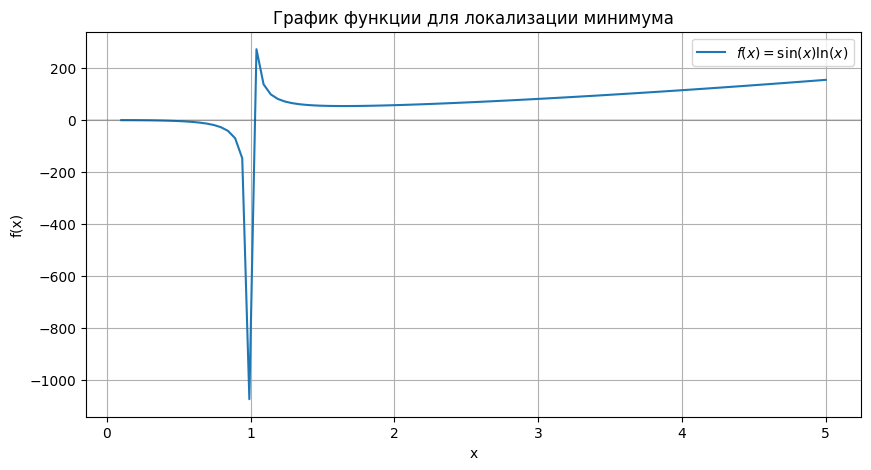

In [27]:
x_vals = np.linspace(0.1, 5, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label=r'$f(x) = \sin(x) \ln(x)$')
plt.axhline(0, color='black', linewidth=0.2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции для локализации минимума')
plt.legend()
plt.show()

простая функция локализации:


In [18]:
def localize_minimum(func, x_start=0.1, x_end=5.0, step=0.01):
    x = x_start
    prev_val = func(x)
    x += step
    while x <= x_end:
        curr_val = func(x)
        # Если начало возрастания после убывания — минимум где-то слева
        if curr_val > prev_val:
            # Возвращаем интервал [x - 2*step, x]
            a = max(x_start, x - 2 * step)
            b = x
            return a, b
        prev_val = curr_val
        x += step
    raise ValueError("Минимум не найден в заданном диапазоне")
def localize_first_minimum(func, x_start=1.1, x_end=5.0, step=0.001):
    x = x_start
    f_prev = func(x)
    if not np.isfinite(f_prev):
        raise ValueError(f"Функция не определена в x={x}")
    x += step
    while x <= x_end:
        f_curr = func(x)
        if not np.isfinite(f_curr):
            x += step
            continue
        if f_curr > f_prev:  # начало роста → минимум слева
            a = max(x_start, x - 2 * step)
            b = x
            return a, b
        f_prev = f_curr
        x += step
    raise ValueError("Первый минимум не найден")

In [19]:
a, b = localize_minimum(f)
a, b

(0.9800000000000006, 1.0000000000000007)

# Реализация методов


# Метод дихотомии

In [20]:
def dichotomy_method(func, a, b, eps=1e-5):
    delta = eps / 3
    f_count = 0
    
    while (b - a) > eps:
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        f1 = func(x1); f_count += 1
        f2 = func(x2); f_count += 1
        
        if f1 < f2:
            b = x2
        else:
            a = x1
    x_min = (a + b) / 2
    return x_min, func(x_min), f_count

# Метод золотого сечения

In [21]:
def golden_section_method(func, a, b, eps=1e-5):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = func(x1); f_count = 2
    f2 = func(x2)
    
    while (b - a) > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = func(x1); f_count += 1
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = func(x2); f_count += 1
            
    x_min = (a + b) / 2
    return x_min, func(x_min), f_count

# Метод Фибоначчи

In [22]:
def fibonacci_method(func, a, b, eps=1e-5):
    fib = [1, 1]
    while fib[-1] < (b - a) / eps:
        fib.append(fib[-1] + fib[-2])
    N = len(fib) - 1
    
    f_count = 0
    k = 0
    x1 = a + (fib[N - 2] / fib[N]) * (b - a)
    x2 = a + (fib[N - 1] / fib[N]) * (b - a)
    f1 = func(x1); f_count += 1
    f2 = func(x2); f_count += 1
    
    for k in range(N - 2):
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (fib[N - k - 3] / fib[N - k - 1]) * (b - a)
            f1 = func(x1); f_count += 1
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (fib[N - k - 2] / fib[N - k - 1]) * (b - a)
            f2 = func(x2); f_count += 1
    
    x2 = x1 + eps
    f2 = func(x2); f_count += 1
    if f1 < f2:
        b = x2
    else:
        a = x1
    
    x_min = (a + b) / 2
    return x_min, func(x_min), f_count

In [23]:
def safe_f(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        y = 10 * x**2 / np.log(x)
    # Заменяем неконечные значения на np.inf (векторно!)
    y = np.where(np.isfinite(y), y, np.inf)
    return y

In [24]:
eps = 1e-5

# Локализуем
try:
    a0, b0 = localize_first_minimum(safe_f, 1.1, 5.0, 0.001)
    print(f"Интервал локализации: [{a0:.4f}, {b0:.4f}]")
except Exception as e:
    print("Ошибка локализации:", e)
    a0, b0 = 1.5, 3.0  # резервный интервал

# Запускаем методы
x_dich, f_dich, cnt_dich = dichotomy_method(safe_f, a0, b0, eps)
x_gold, f_gold, cnt_gold = golden_section_method(safe_f, a0, b0, eps)
x_fib,  f_fib,  cnt_fib  = fibonacci_method(safe_f, a0, b0, eps)

print(f"\nРезультаты:")
print(f"Метод дихотомии:      x = {x_dich:.6f}, f(x) = {f_dich:.6f}, вычислений: {cnt_dich}")
print(f"Метод золотого сечения: x = {x_gold:.6f}, f(x) = {f_gold:.6f}, вычислений: {cnt_gold}")
print(f"Метод Фибоначчи:       x = {x_fib:.6f}, f(x) = {f_fib:.6f}, вычислений: {cnt_fib}")

Интервал локализации: [1.6480, 1.6500]

Результаты:
Метод дихотомии:      x = 1.648721, f(x) = 54.365637, вычислений: 18
Метод золотого сечения: x = 1.648721, f(x) = 54.365637, вычислений: 14
Метод Фибоначчи:       x = 1.648722, f(x) = 54.365637, вычислений: 13


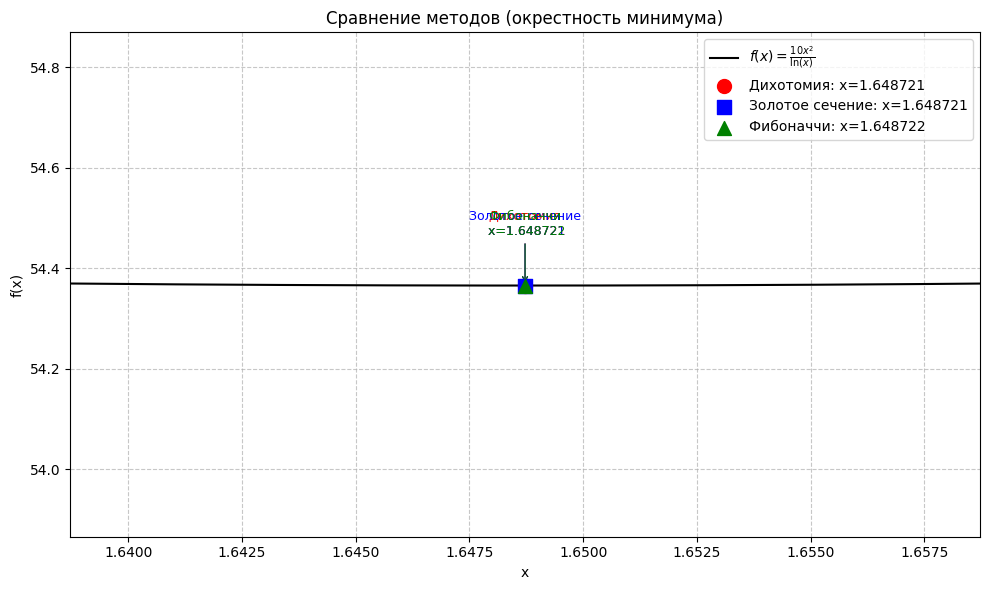

In [25]:
# Построим график в окрестности минимума
x_center = x_gold  # или среднее
delta = 0.01
x_zoom = np.linspace(x_center - delta, x_center + delta, 500)
y_zoom = safe_f(x_zoom)

# Удалим NaN/Inf
valid = np.isfinite(y_zoom)
x_zoom = x_zoom[valid]
y_zoom = y_zoom[valid]

plt.figure(figsize=(10, 6))
plt.plot(x_zoom, y_zoom, 'k-', linewidth=1.5, label=r'$f(x) = \frac{10x^2}{\ln(x)}$')

results = {
    "Дихотомия":        {"x": x_dich, "f": f_dich, "color": "red",    "marker": "o"},
    "Золотое сечение": {"x": x_gold, "f": f_gold, "color": "blue",   "marker": "s"},
    "Фибоначчи":       {"x": x_fib,  "f": f_fib,  "color": "green",  "marker": "^"}
}

for method, data in results.items():
    plt.scatter(data["x"], data["f"], 
                color=data["color"], 
                marker=data["marker"], 
                s=100, 
                zorder=5, 
                label=f'{method}: x={data["x"]:.6f}')
    
    plt.annotate(f'{method}\n x={data["x"]:.6f}',
                 xy=(data["x"], data["f"]),
                 xytext=(data["x"], data["f"] + 0.1),
                 fontsize=9,
                 ha='center',
                 color=data["color"],
                 arrowprops=dict(arrowstyle='->', color=data["color"], lw=0.8))

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Сравнение методов (окрестность минимума)')
plt.legend()
plt.xlim(x_center - delta, x_center + delta)
plt.ylim(min(y_zoom) - 0.5, max(y_zoom) + 0.5)
plt.tight_layout()
plt.show()

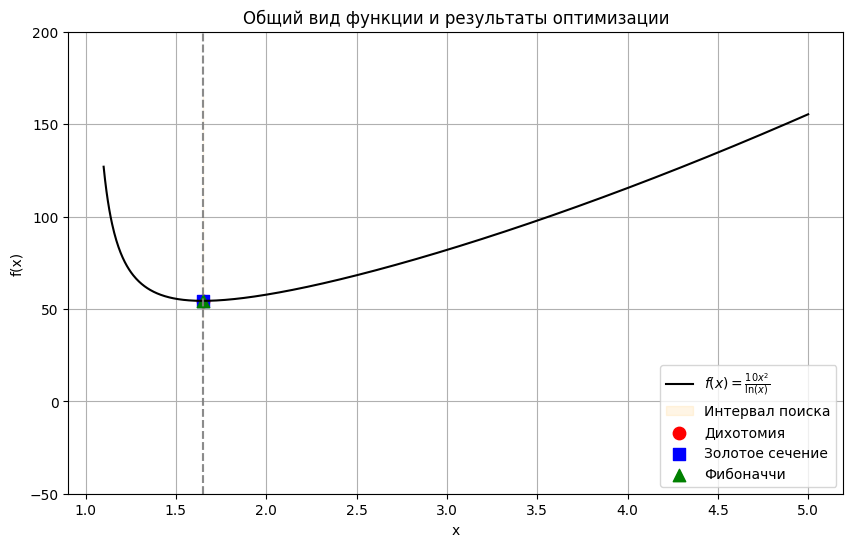

In [26]:
x_full = np.linspace(1.1, 5, 1000)
y_full = safe_f(x_full)

plt.figure(figsize=(10, 6))
plt.plot(x_full, y_full, 'k-', label=r'$f(x) = \frac{10x^2}{\ln(x)}$')

# Отметим интервал локализации
plt.axvline(a0, color='gray', linestyle='--', alpha=0.7)
plt.axvline(b0, color='gray', linestyle='--', alpha=0.7)
plt.fill_betweenx([min(y_full)-10, max(y_full)+10], a0, b0, color='orange', alpha=0.1, label='Интервал поиска')

# Отметим точки минимумов
for method, data in results.items():
    plt.scatter(data["x"], data["f"], color=data["color"], marker=data["marker"], s=80, label=method)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Общий вид функции и результаты оптимизации')
plt.legend()
plt.ylim(-50, 200)  # ограничим для наглядности
plt.show()